In [1]:
import os, sys
sys.path.append('..')

import matplotlib.pyplot as plt
import PIL
from PIL import Image
import seaborn as sns

from dataloader import *
from tools import *
from models import *

from PIL import Image
import numpy as np

%matplotlib inline

Using TensorFlow backend.


In [2]:
CLASSES_MAPPING = {
    0: 'Abstract Art',
    1: 'Art Nouveau (Modern)',
    2: 'Baroque',
    3: 'Conceptual Art',
    4: 'Cubism',
    5: 'Expressionism',
    6: 'Impressionism',
    7: 'Minimalism',
    8: 'Naïve Art (Primitivism)',
    9: 'Neo-Expressionism',
    10: 'Neoclassicism',
    11: 'Pop Art',
    12: 'Realism',
    13: 'Renaissance',
    14: 'Romanticism',
    15: 'Surrealism',
    16: 'Symbolism',
    17: 'Ukiyo-e'
    }

In [3]:
## load models
base_model, top_model = load_models(MODEL_VERSION, MODEL_BASE_TAG, from_notebook=True)

In [4]:
!ls

1920px-Monet_-_Impression,_Sunrise.jpg  Predictions.ipynb
Baroque.jpg                             Realism.jpg
Bottleneck.ipynb                        Tsunami_by_hokusai_19th_century.jpg
EDA.ipynb                               girl-and-cat-1969.jpg
LRFinder.ipynb                          haystacks-at-giverny.jpg!Large.jpg
Model Structure.ipynb                   madame-monet-and-child(1).jpg!Large.jpg
Models.ipynb                            papillon.jpg
Mona_Lisa,_by_Leonardo_da_Vinci.jpg     popart.jpg
NR.jpg                                  prediction.png
PI.jpg


In [5]:
## load image
file_name = "1920px-Monet_-_Impression,_Sunrise.jpg"

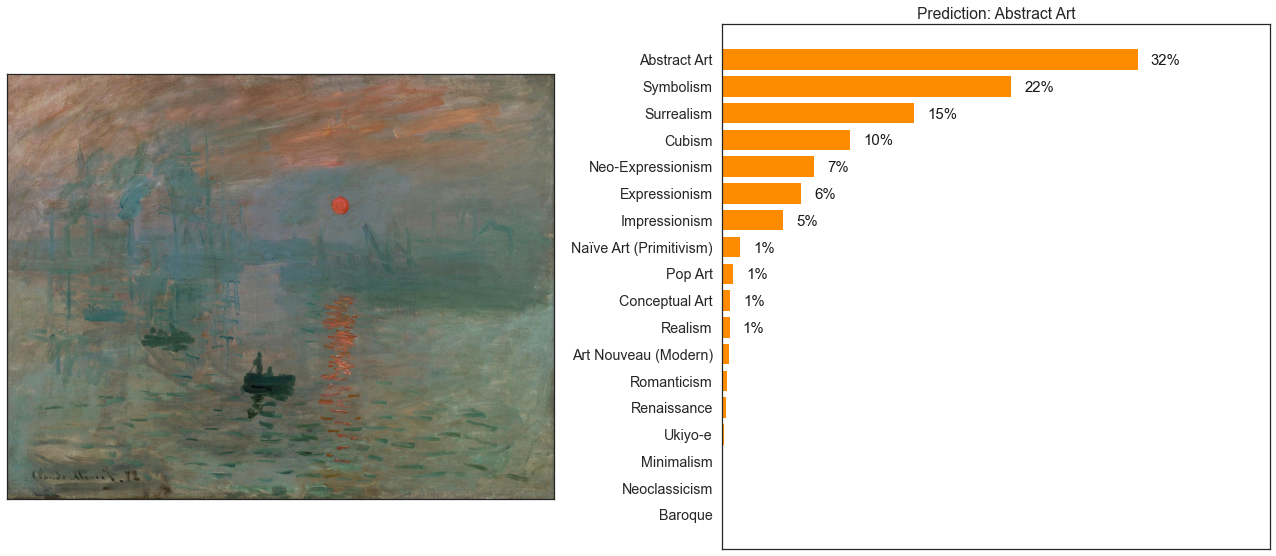

In [6]:
sns.set(font_scale = 1.3)
sns.set_style("white")

## open image
im = Image.open(file_name)

fig, axes = plt.subplots(1,2, figsize=(18,8))
axes[0].imshow(im)
axes[0].axes.xaxis.set_visible(False)
axes[0].axes.yaxis.set_visible(False)

im = im.resize((224, 224)) 
im = np.asarray(im)

## pre-process
im = im / 255
im = np.expand_dims(im, axis=0)

bottleneck_prediction = base_model.predict(im)
predictions = top_model.predict(bottleneck_prediction)

orders = predictions.argsort()[0]

predicted_class = CLASSES_MAPPING[predictions.argmax(axis=1)[0]]

axes[1].barh(np.array(list(CLASSES_MAPPING.values()))[orders],predictions[0][orders], color="darkorange")
axes[1].set_title("Prediction: " + predicted_class)
for i, v in enumerate(predictions[0][orders]):
    if v>0.005:
        axes[1].text(v + 0.01, i - .2, "{:.0f}%".format(100*v), color='k', fontsize=15)
axes[1].set_xlim(0, predictions[0].max()+0.1)
axes[1].axes.xaxis.set_visible(False)

plt.tight_layout()
plt.show()

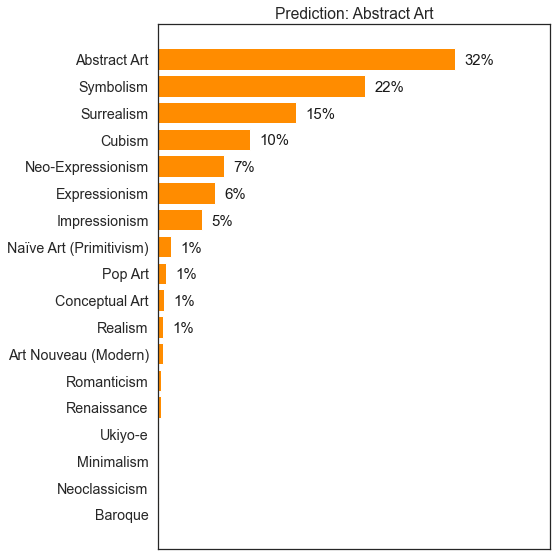

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
ax.barh(np.array(list(CLASSES_MAPPING.values()))[orders],predictions[0][orders], color="darkorange")
ax.set_title("Prediction: " + predicted_class)
for i, v in enumerate(predictions[0][orders]):
    if v>0.005:
        ax.text(v + 0.01, i - .2, "{:.0f}%".format(100*v), color='k', fontsize=15)
ax.set_xlim(0, predictions[0].max()+0.1)
ax.axes.xaxis.set_visible(False)
plt.tight_layout()
plt.savefig("prediction", dpi=150)
plt.show()